In [1]:
# Importing modules 
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['cups', 'plates', 'spoons']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():
    """
        Load the data:
            - 32 images to train the network.
            - 15 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../input/cup-spoon-and-plate/cup-spoon-plate/cup-spoon-plate/csp_train', '../input/cup-spoon-and-plate/cup-spoon-plate/cup-spoon-plate/csp_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

 25%|██▌       | 2/8 [00:00<00:00, 17.29it/s]

Loading ../input/cup-spoon-and-plate/cup-spoon-plate/cup-spoon-plate/csp_train


  0%|          | 0/7 [00:00<?, ?it/s]

Loading ../input/cup-spoon-and-plate/cup-spoon-plate/cup-spoon-plate/csp_test


100%|██████████| 4/4 [00:00<00:00, 19.33it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 32
Number of testing examples: 15
Each image is of size: (150, 150)


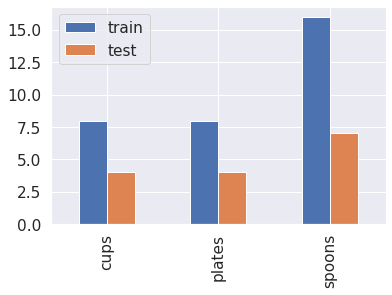

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

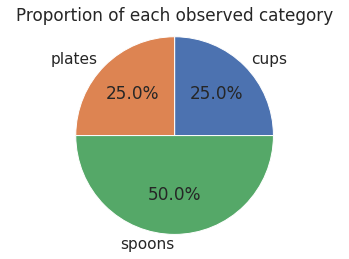

In [8]:
plt.pie(train_counts,
        explode=(0, 0, 0,) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [9]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [10]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

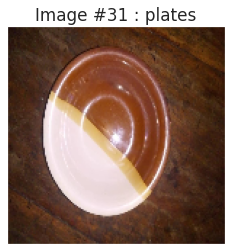

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 10 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

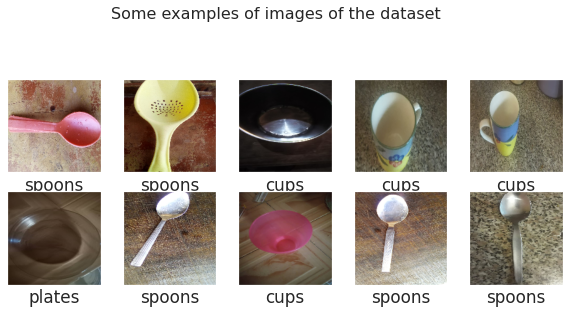

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [17]:
history = model.fit(train_images, train_labels, batch_size=96, epochs=15, validation_split = 0.2)

Epoch 1/15
1/1 [==============================] - 0s 208ms/step - loss: 1.8294 - accuracy: 0.0000e+00 - val_loss: 3.6436 - val_accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 43ms/step - loss: 3.4597 - accuracy: 0.4800 - val_loss: 3.7747 - val_accuracy: 0.1429
Epoch 3/15
1/1 [==============================] - 0s 41ms/step - loss: 2.9633 - accuracy: 0.2800 - val_loss: 1.3616 - val_accuracy: 0.2857
Epoch 4/15
1/1 [==============================] - 0s 41ms/step - loss: 1.2170 - accuracy: 0.2800 - val_loss: 1.0158 - val_accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 50ms/step - loss: 0.9501 - accuracy: 0.5200 - val_loss: 1.2655 - val_accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 40ms/step - loss: 1.0882 - accuracy: 0.5200 - val_loss: 1.0991 - val_accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 42ms/step - loss: 0.8209 - accuracy: 0.5600 - val_loss: 0.9277 - val_accuracy: 0.5714
Epoch 8/15
1/1 [======

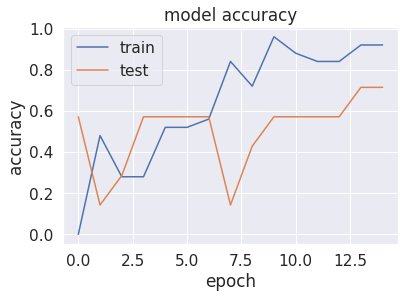

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

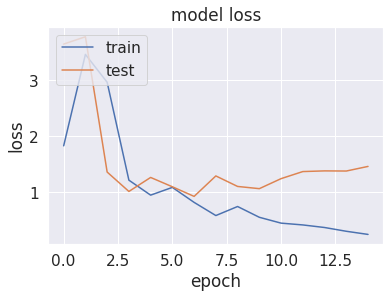

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Evaluating model on validation data
evaluate = model.evaluate(test_images,test_labels)
print(evaluate)

1/1 [==============================] - 0s 2ms/step - loss: 1.2698 - accuracy: 0.4000
[1.269830584526062, 0.4000000059604645]


Data Augmentation

In [21]:
train_dir = '../input/cup-spoon-and-plate/cup-spoon-plate/cup-spoon-plate/csp_train'
test_dir = '../input/cup-spoon-and-plate/cup-spoon-plate/cup-spoon-plate/csp_test'

Applying horizontal flip

In [22]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=96,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size = (150,150))


Found 32 images belonging to 3 classes.


In [23]:
sample_training_images, _ = next(train_data_gen)

In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

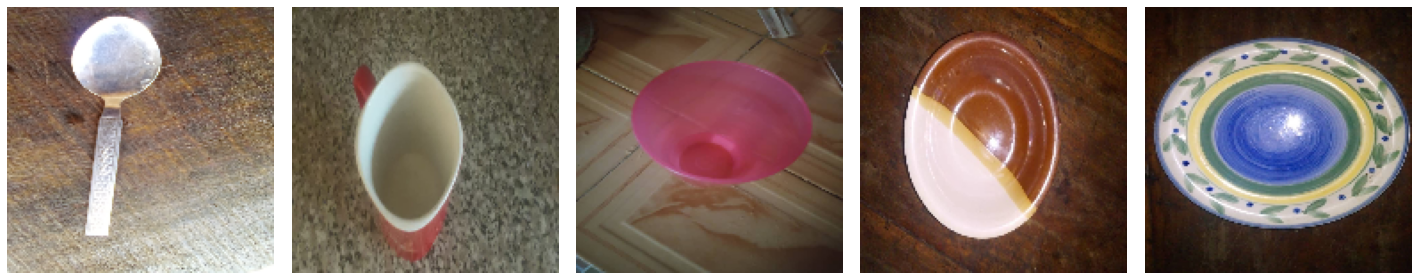

In [25]:
plotImages(sample_training_images[:5])

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

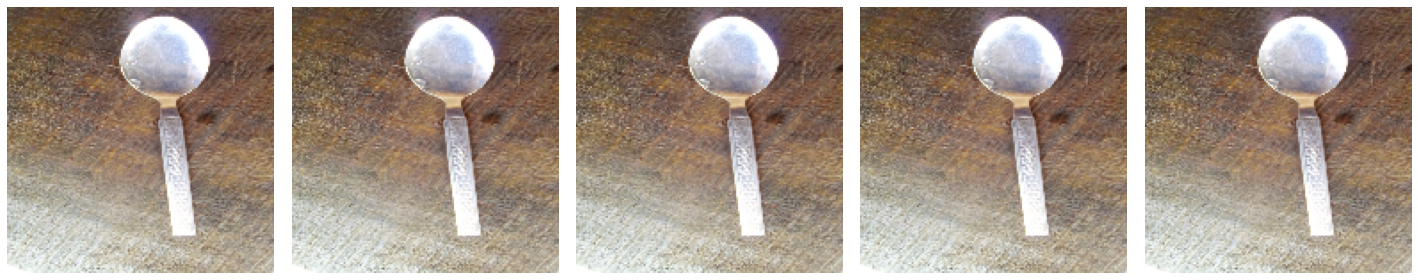

In [27]:
plotImages(augmented_images)

Randomly rotate the image

In [28]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [29]:
train_data_gen = image_gen.flow_from_directory(batch_size=96,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(150,150))


Found 32 images belonging to 3 classes.


In [30]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

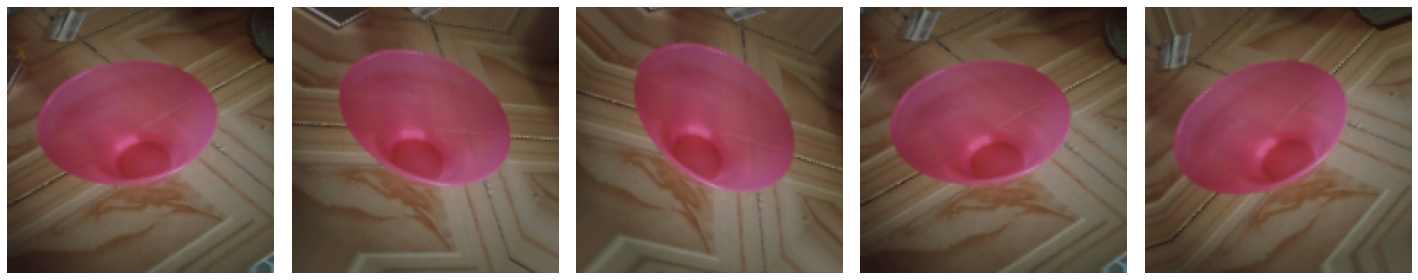

In [31]:
plotImages(augmented_images)

Zoom augmentation

In [32]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) #

train_data_gen = image_gen.flow_from_directory(batch_size=96,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(150,150))

Found 32 images belonging to 3 classes.


In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

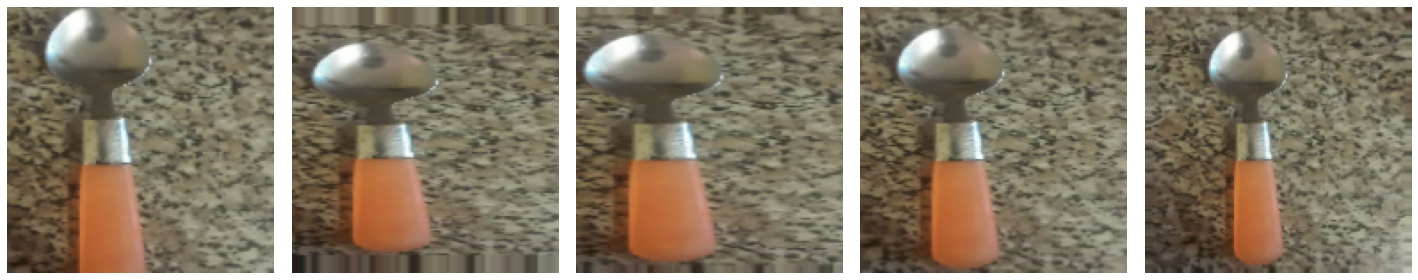

In [34]:
plotImages(augmented_images)

In [35]:
"""# putting it all together"""

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [36]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=96,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(150,150),
                                                     class_mode='categorical')

Found 32 images belonging to 3 classes.


In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

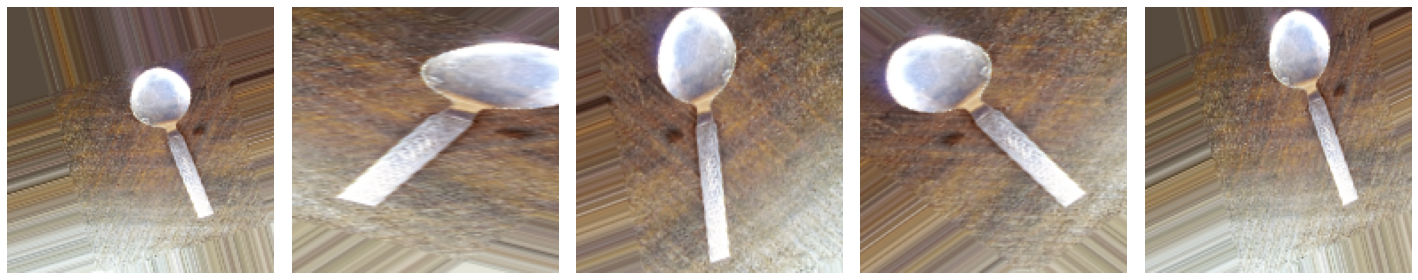

In [38]:
plotImages(augmented_images)

In [39]:
"""# create validator data generator"""

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=96,
                                                 directory=test_dir,
                                                 target_size=(150,150),
                                                 class_mode='categorical')

Found 15 images belonging to 3 classes.


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(train_images, train_labels, batch_size=96, epochs=15, validation_split = 0.2)

Epoch 1/15
1/1 [==============================] - 0s 170ms/step - loss: 1.7572 - accuracy: 0.0000e+00 - val_loss: 3.4714 - val_accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 45ms/step - loss: 3.3915 - accuracy: 0.4800 - val_loss: 1.5146 - val_accuracy: 0.1429
Epoch 3/15
1/1 [==============================] - 0s 58ms/step - loss: 1.0777 - accuracy: 0.6400 - val_loss: 1.0510 - val_accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 43ms/step - loss: 0.8976 - accuracy: 0.4400 - val_loss: 1.0172 - val_accuracy: 0.2857
Epoch 5/15
1/1 [==============================] - 0s 42ms/step - loss: 0.8708 - accuracy: 0.4000 - val_loss: 0.9073 - val_accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 45ms/step - loss: 0.6552 - accuracy: 0.7200 - val_loss: 1.0023 - val_accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 43ms/step - loss: 0.5607 - accuracy: 0.8000 - val_loss: 1.1784 - val_accuracy: 0.5714
Epoch 8/15
1/1 [======

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

Text(0.5, 1.0, 'Training and Validation Accuracy')

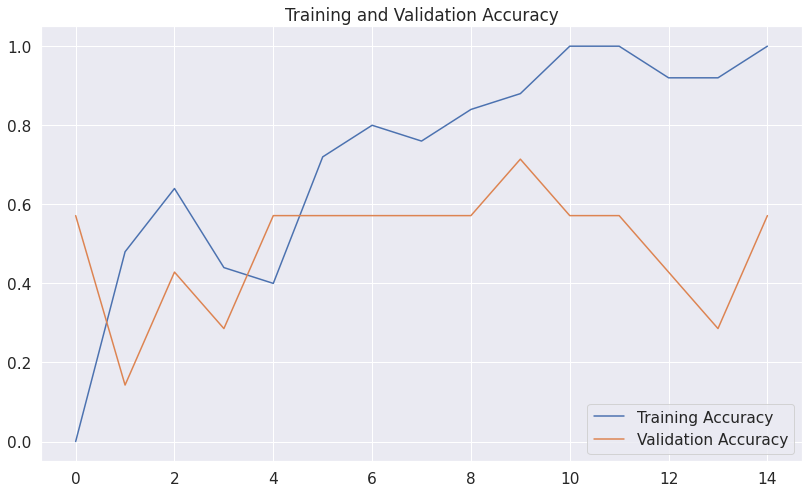

In [45]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

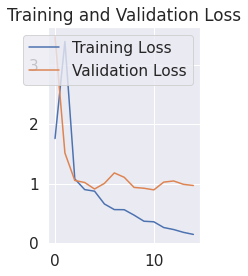

In [46]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()